In [1]:
import sys; sys.path.append('../../')
from DataPreparation.DataPreparation import read_data
from ModelPipelines.ModelAnalysis import recursive_feature_elimination, test_log_linearity, show_hyperparams, vc_dimension_check,validation_curves,learning_curves
import importlib; importlib.reload(sys.modules['ModelPipelines.ModelAnalysis'])
from sklearn.linear_model import LogisticRegression
from HandleClassImbalance.HandleClassImbalance import *
import numpy as np
from sklearn.model_selection import cross_val_predict
from mlpath import mlquest as mlq

### Initialize Model

In [2]:
x_data_d, y_data_d = read_data(kind='Numerical')
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_data_d, y_data_d)

LogisticRegression(multi_class='multinomial')

### Hyperparameters

In [3]:
show_hyperparams(clf)

C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,multinomial
n_jobs,None
penalty,l2
random_state,None


### VC Dimension

In [4]:
vc_dimension_check(clf, x_data_d)

Model generalization is safe. VC Bound is satisfied where 10dvc=370 < N=1180


### Recursive Feature Elimination

Features to keep ['Age' 'Height' 'Weight' 'Veg_Consump']


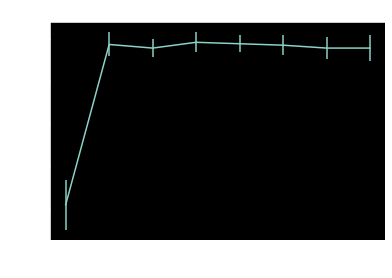

In [5]:
recursive_feature_elimination(clf, min_feats=1, cv=5, x_data_d=x_data_d, y_data_d=y_data_d)

### Test Log-Linearity

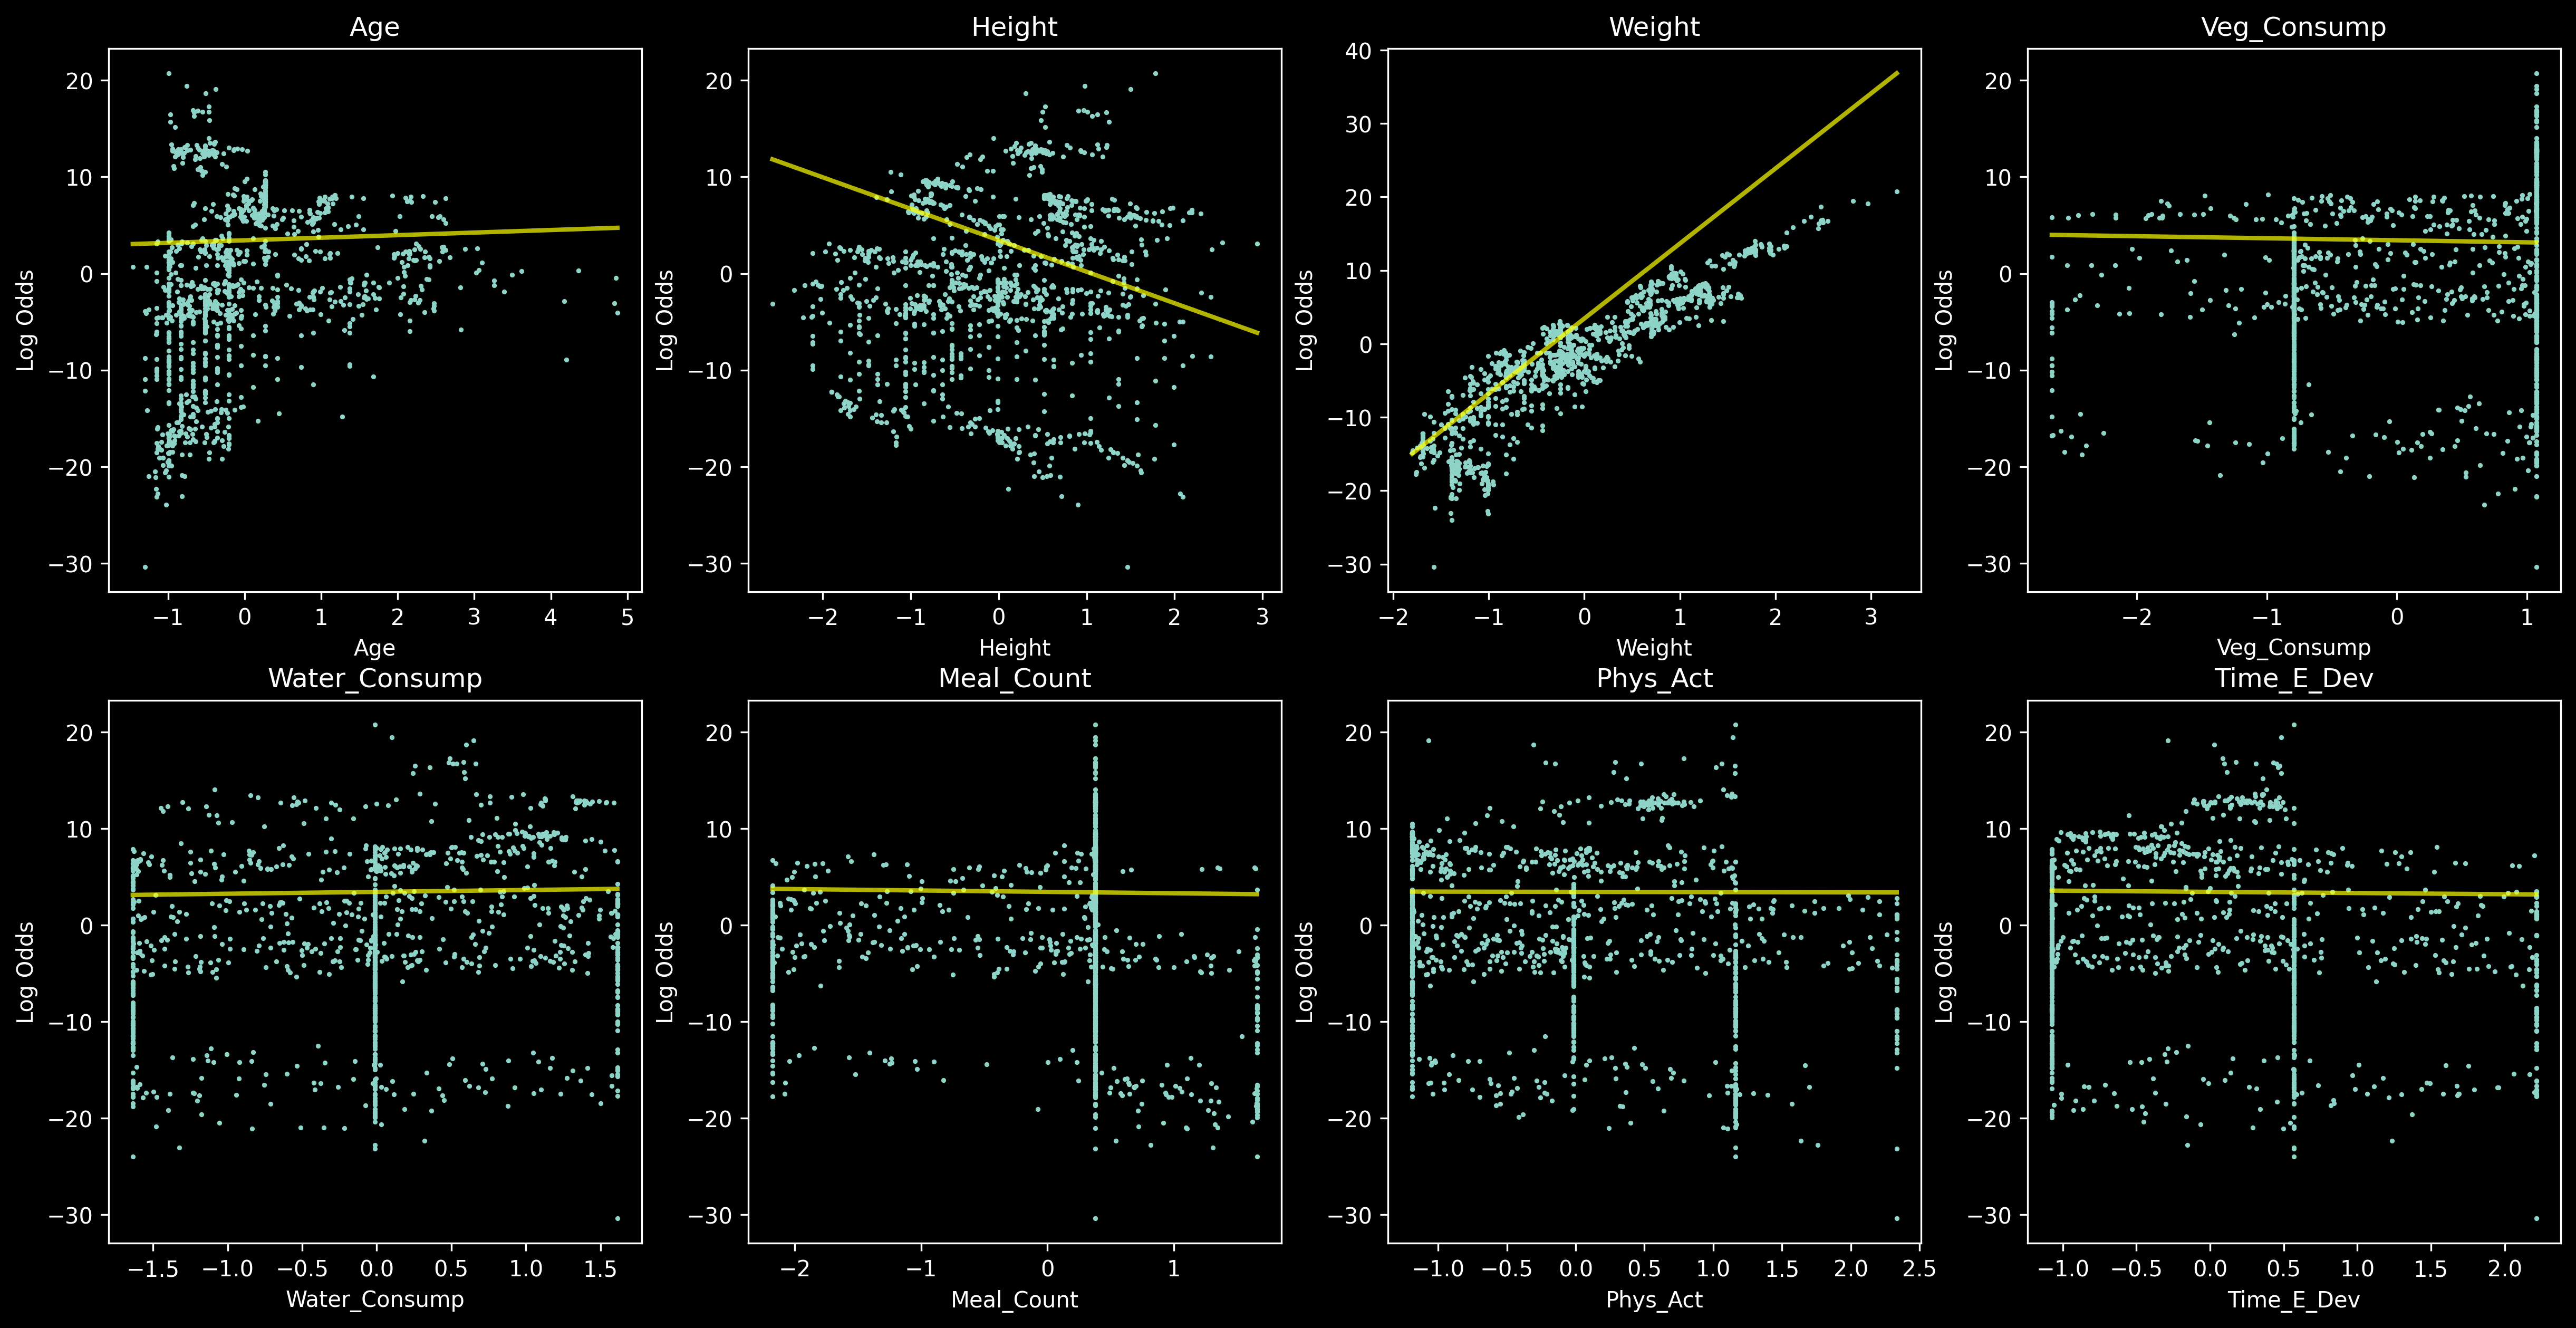

In [6]:
test_log_linearity(clf, class_index=3, x_data_d=x_data_d, y_data_d=y_data_d)

## Handling class imbalance

1- evaluate All resampling methods and cost sensitive

In [7]:
methods=['No Resampling', 'SMOTE','BorderlineSMOTE','Under Sampling','Cost Sensitive']
sample_ratio=[1,1,1]
k=5
evaluate_class_imbalance_handler_over_methods(x_data_d,y_data_d ,clf , methods=methods , sample_ratio=[1,1,1], k=k)

K = 5, Sampling Ratio = [1, 1, 1]


,Method,Accuracy
0,No Resampling,0.933051
1,SMOTE,0.961857
2,BorderlineSMOTE,0.965074
3,Under Sampling,0.914474
4,Cost Sensitive,0.668644


2-SMOTE with const k and multiple sample strategy

In [8]:
sample_ratios=[[1,1,1],[0.6,0.7,0.8],[0.7,0.8,0.9], [0.8,0.8,1] ]
k=10
evaluate_const_k_diff_sample_ratios(x_data_d,y_data_d ,clf , method='SMOTE' , k=k, sample_ratios=sample_ratios)

Method = SMOTE, K = 10


,Sampling Ratio,Accuracy
0,"[1, 1, 1]",0.591912
1,"[0.6, 0.7, 0.8]",0.610682
2,"[0.7, 0.8, 0.9]",0.599567
3,"[0.8, 0.8, 1]",0.589888


2-SMOTE with const sample strategy and multiple values of k

In [9]:
sample_ratio=[0.6,0.7,0.8] 
Ks=[5,10,15,25,50,70]
evaluate_const_sample_ratios_diff_k(x_data_d,y_data_d ,clf , method='SMOTE' , Ks=Ks, sample_ratio=sample_ratio)

Method = SMOTE, Sampling Ratio = [0.6, 0.7, 0.8]


,K,Accuracy
0,5,0.624332
1,10,0.591691
2,15,0.609496
3,25,0.605935
4,50,0.605341
5,70,0.582789


4- BorderlineSMOTE with const k and multiple sample strategy

In [10]:
sample_ratios=[[1,1,1],[0.6,0.7,0.8],[0.7,0.8,0.9], [0.8,0.8,1] ]
k=10
evaluate_const_k_diff_sample_ratios(x_data_d,y_data_d ,clf , method='BorderlineSMOTE' , k=k, sample_ratios=sample_ratios)

Method = BorderlineSMOTE, K = 10


,Sampling Ratio,Accuracy
0,"[1, 1, 1]",0.570772
1,"[0.6, 0.7, 0.8]",0.584570
2,"[0.7, 0.8, 0.9]",0.575758
3,"[0.8, 0.8, 1]",0.578652


5- BorderlineSMOTE with const sample strategy and multiple k values

In [11]:
sample_ratio=[0.6,0.7,0.8] 
Ks=[5,10,15,25,50,70]
evaluate_const_sample_ratios_diff_k(x_data_d,y_data_d ,clf , method='BorderlineSMOTE' , Ks=Ks, sample_ratio=sample_ratio)

Method = BorderlineSMOTE, Sampling Ratio = [0.6, 0.7, 0.8]


,K,Accuracy
0,5,0.609496
1,10,0.600000
2,15,0.600593
3,25,0.587537
4,50,0.598813
5,70,0.601187


## Validation Curve

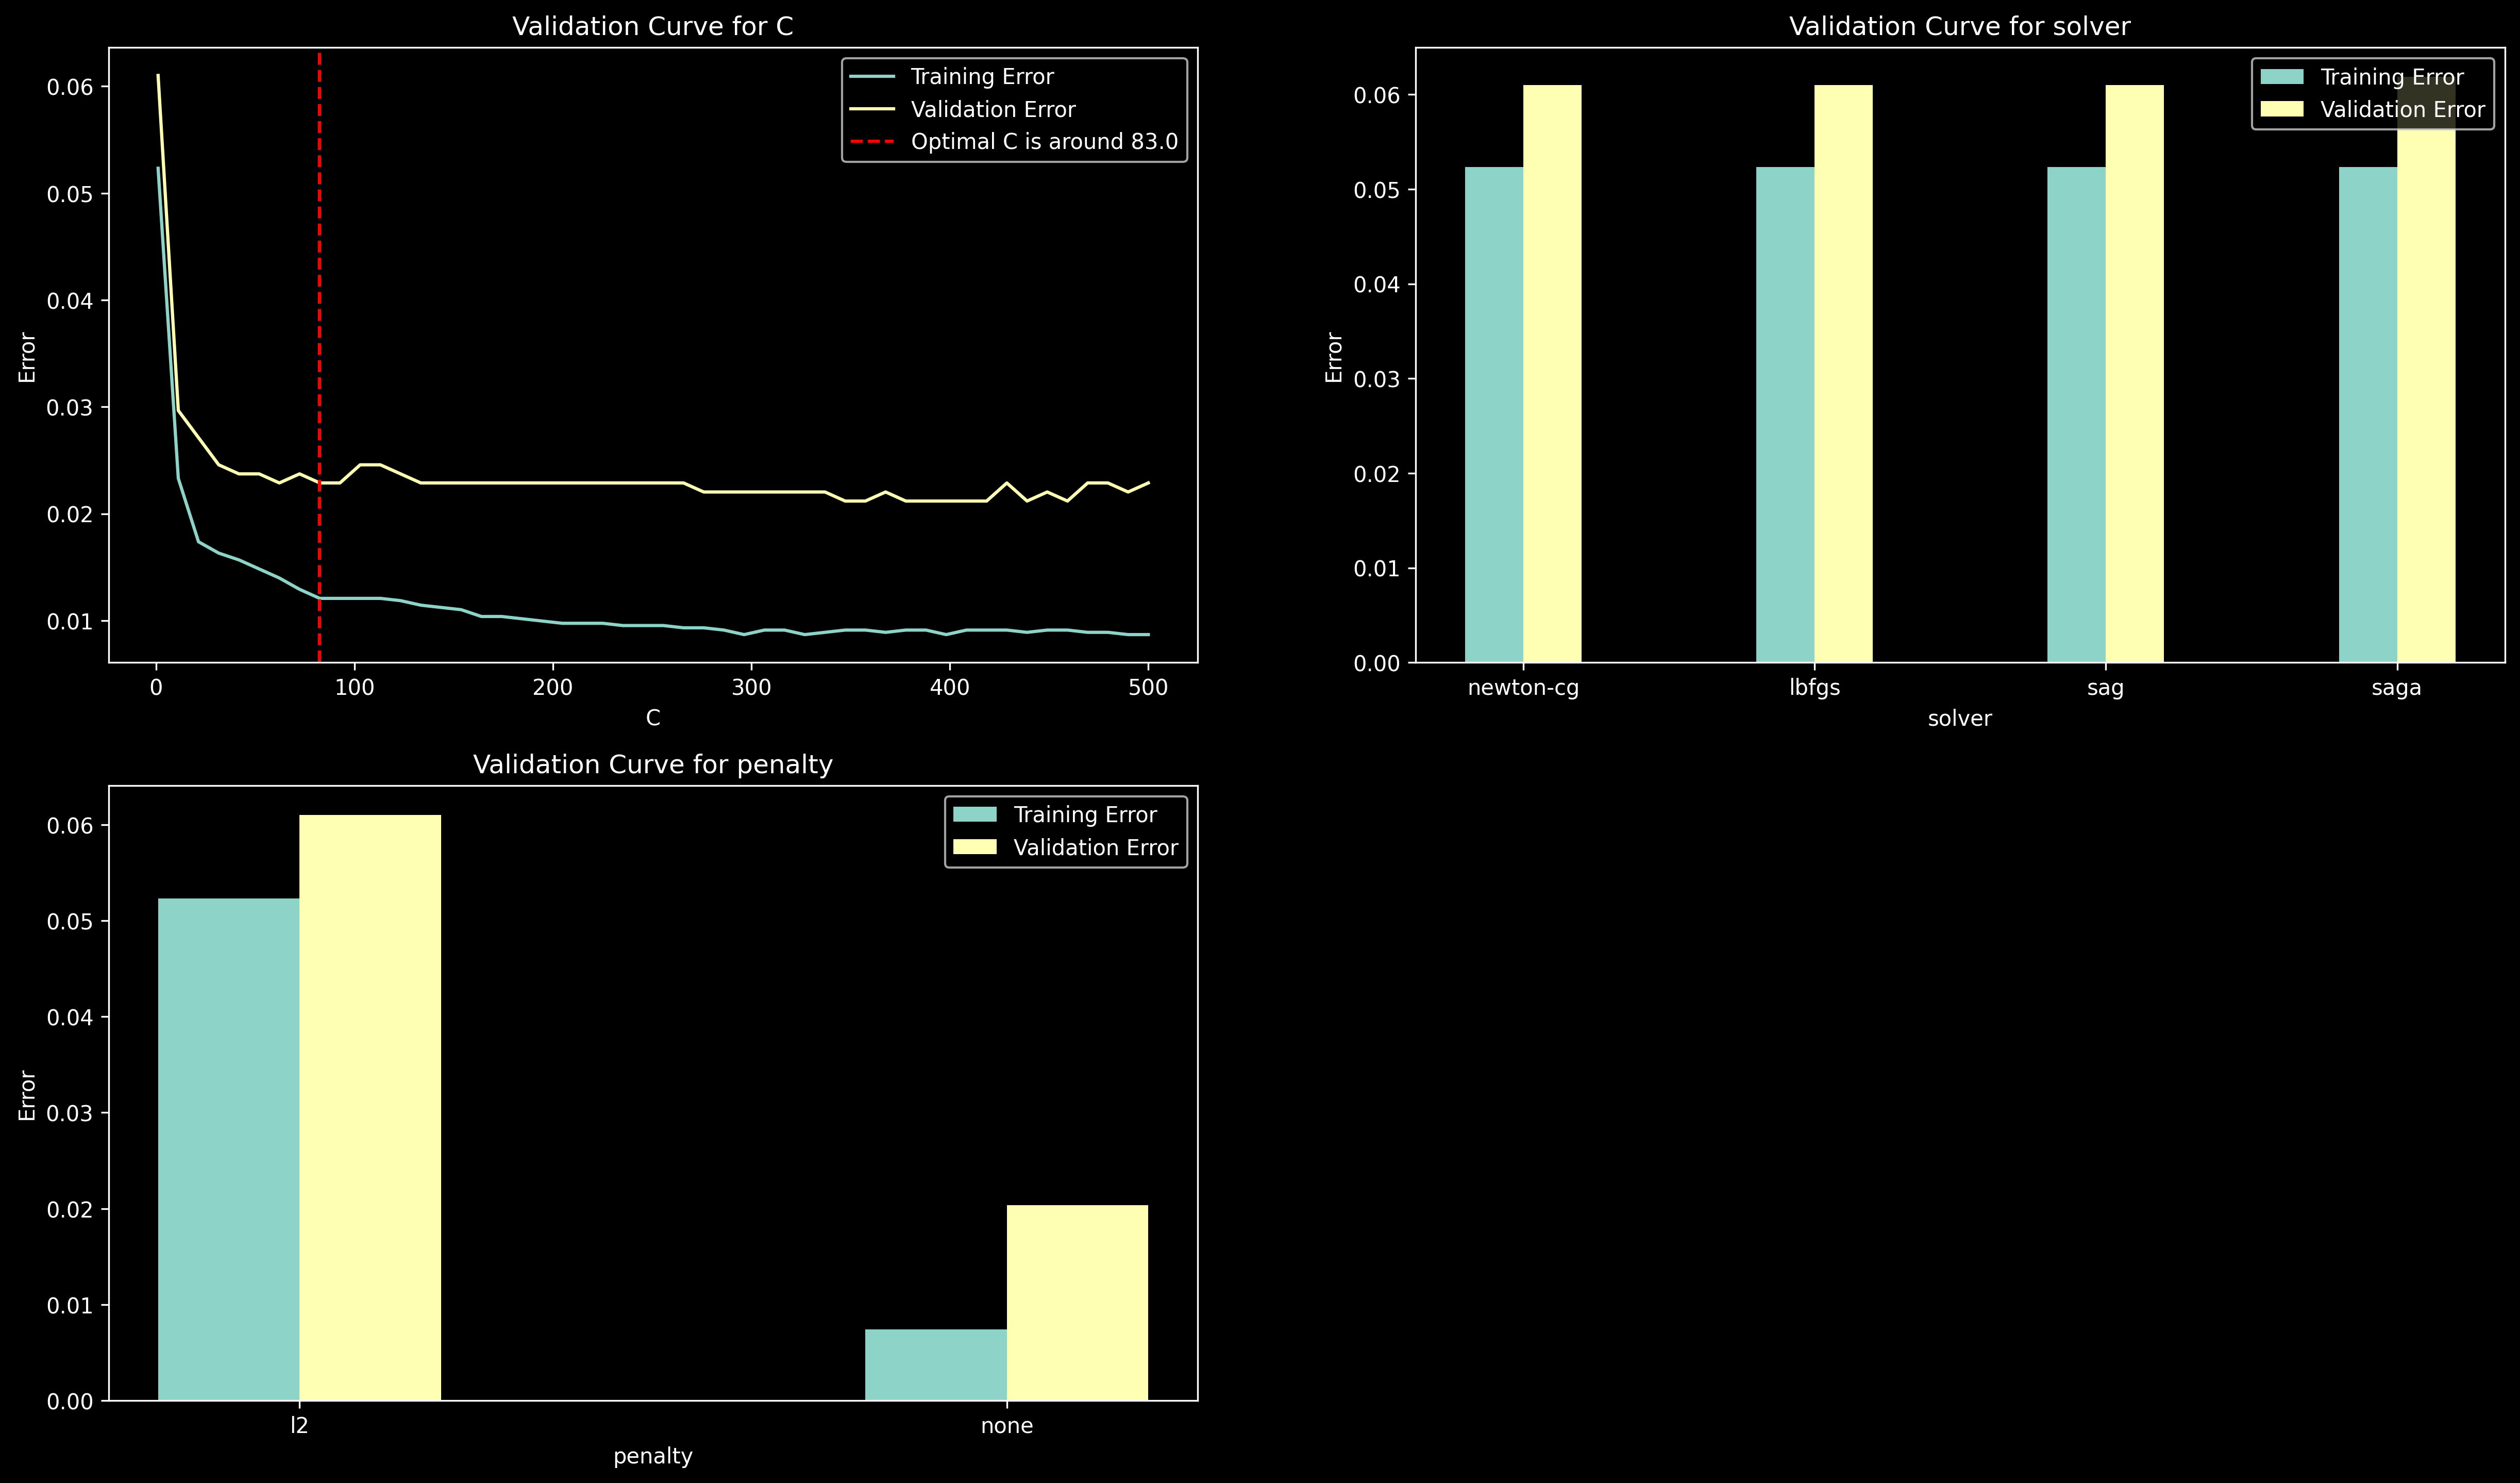

In [14]:
x_data_d, y_data_d = read_data(kind='Numerical')
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_data_d, y_data_d)

hyperparameters= {'C': np.linspace(1, 500, 50),\
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\
                    'penalty': ['l1', 'l2', 'elasticnet', 'none'],}

validation_curves(clf,x_data_d,y_data_d,5,hyperparameters)

### Learning Curve

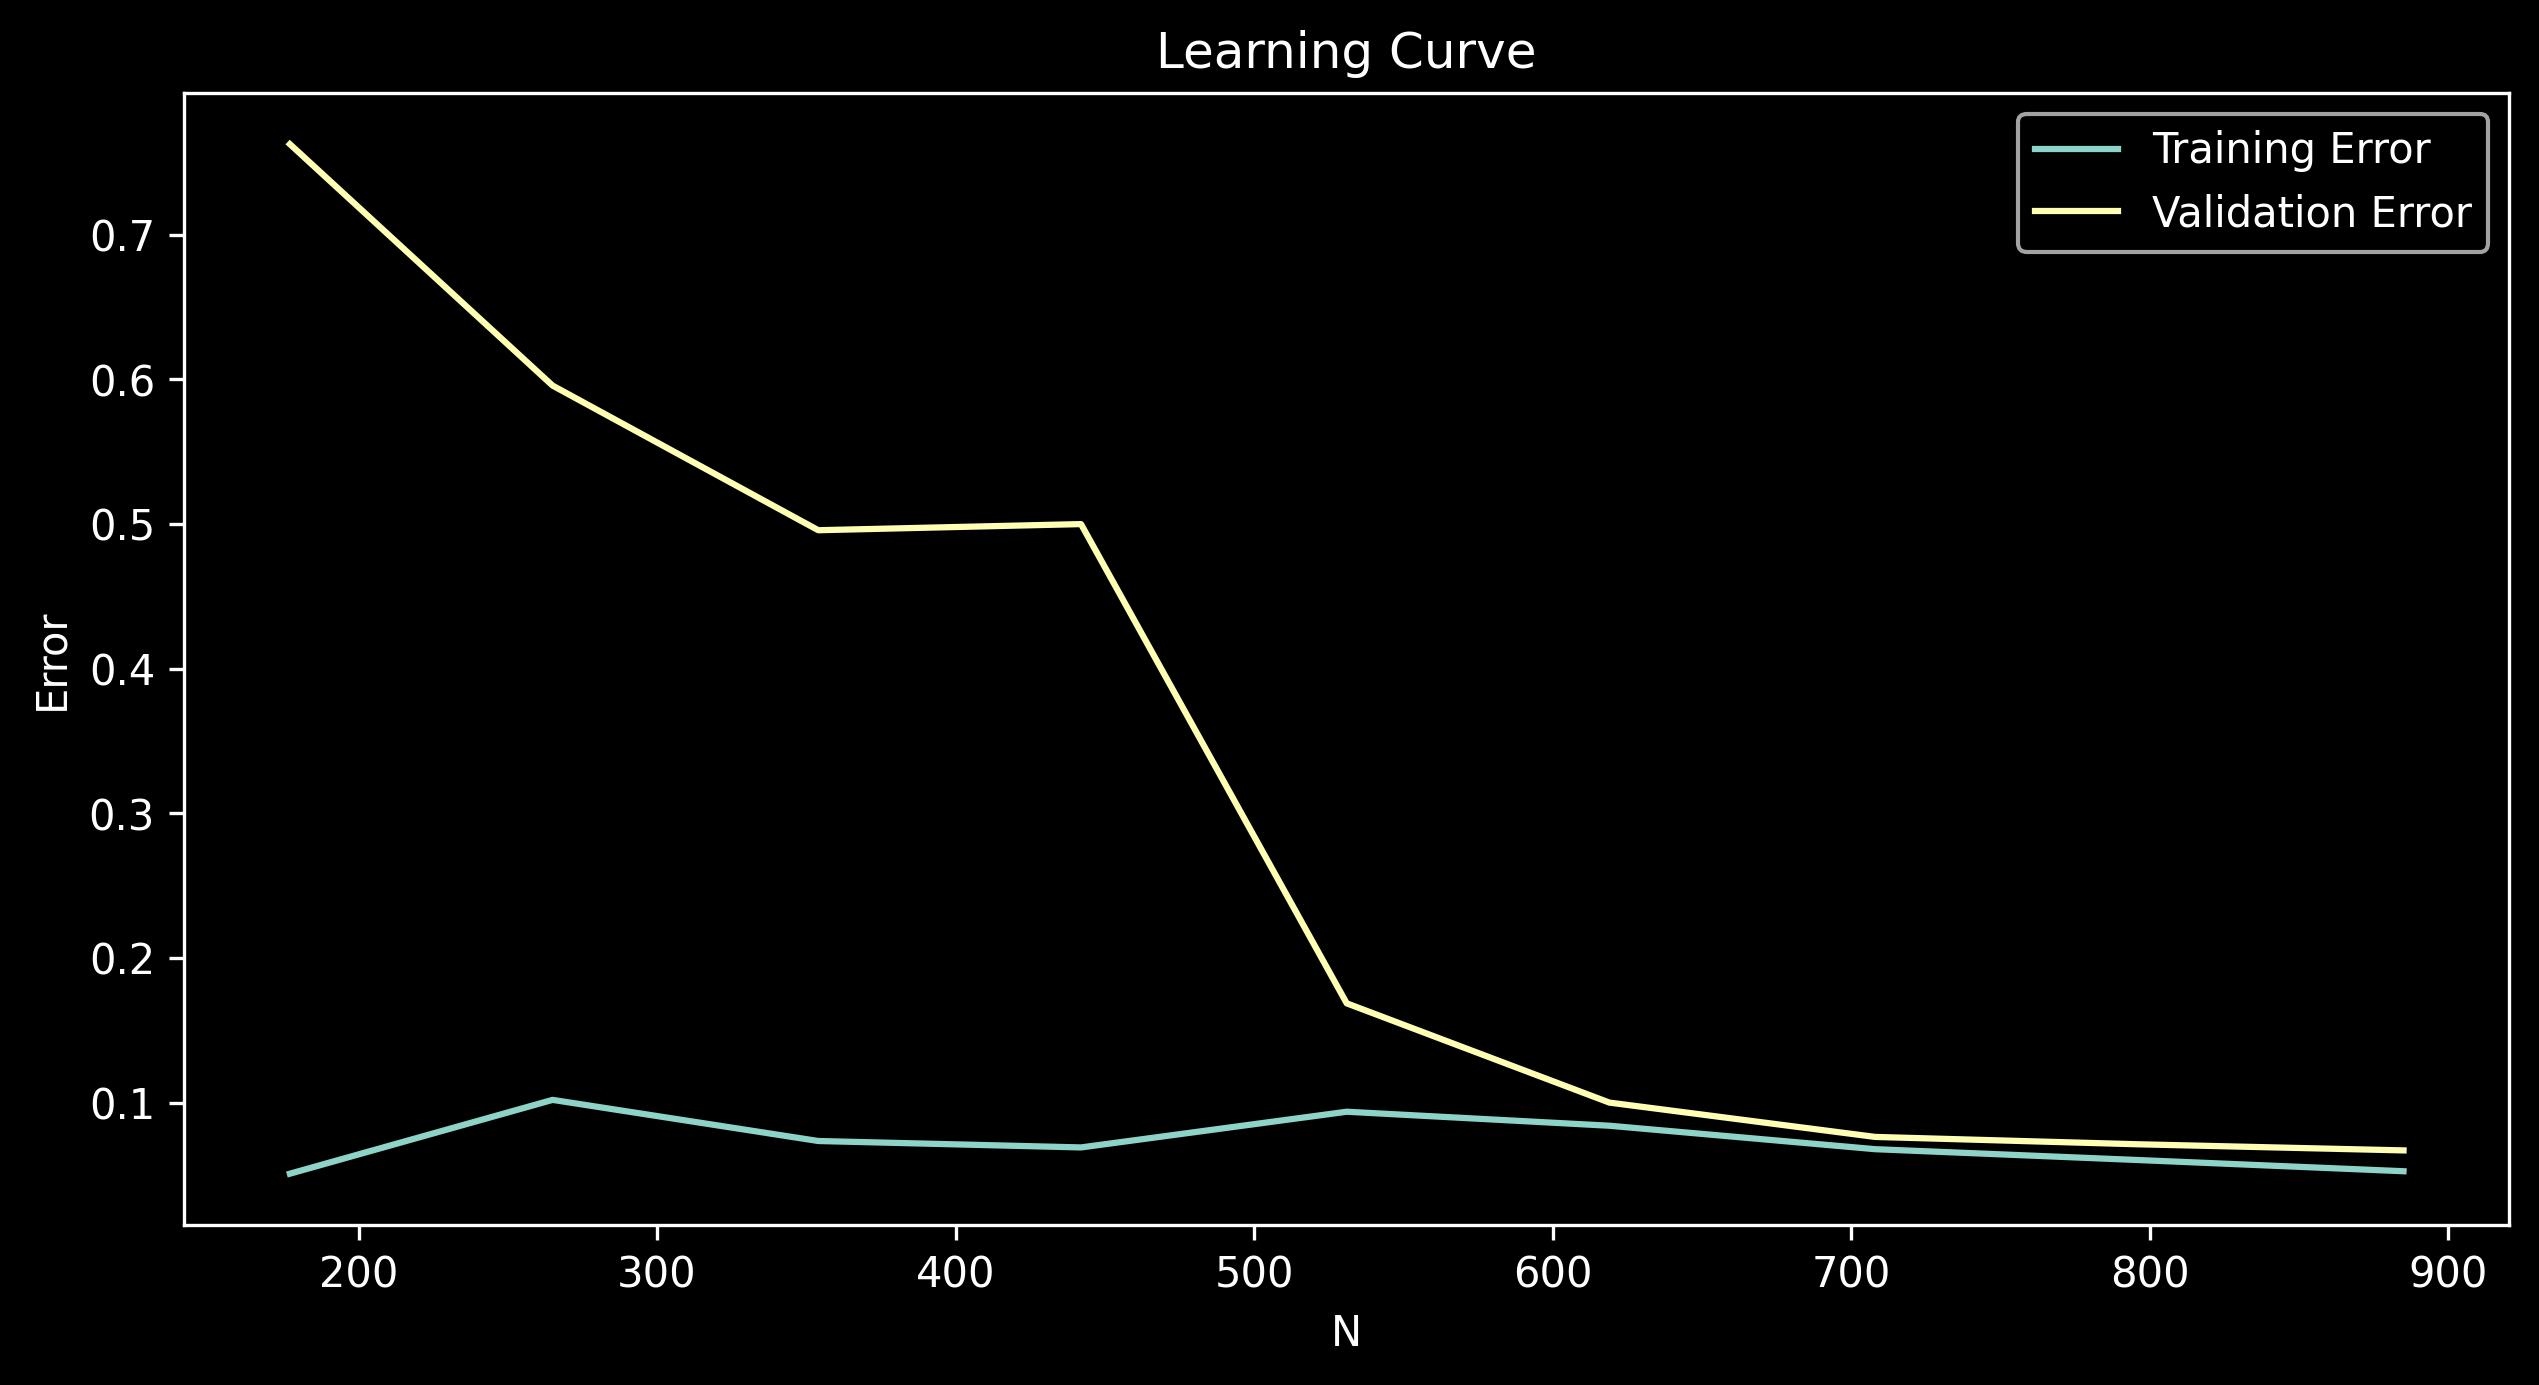

In [13]:
train_sizes=np.linspace(0.1, 1.0, 10)
learning_curves(clf, x_data_d, y_data_d, cv=4,N=train_sizes)